In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from pylab import rcParams
import urllib
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz

import seaborn as sns
import graphviz
import pydotplus
import io
from matplotlib.pyplot import imread
from scipy import misc
import imageio


rdf = pd.read_csv("breast-cancer-Layman.csv")



X = rdf.loc[:,:].values
Y = pd.DataFrame(X)
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()


    
rdf

,Clump-Thickness,Uniformity-of-Cell-Size,Uniformity-of-Cell-Shape,Bare-Nuclei,class
0,5,1,1,1,2
1,5,4,4,10,2
2,3,1,1,2,2
3,6,8,8,4,2
4,4,1,1,1,2
...,...,...,...,...,...
694,3,1,1,2,2
695,2,1,1,1,2
696,5,10,10,3,4
697,4,8,6,4,4


In [2]:
y=X[:,4]
X2=X[:,0:4]

y=y.astype(float)
X2=X2.astype(float)

x_train,x_test,y_train,y_test =train_test_split(X2,y,test_size=.33,random_state=17)

x_train = x_train.astype(float)
y_train = y_train.astype(float)
x_test = x_test.astype(float)
y_test = y_test.astype(float)

clf = neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)
print(clf)

y_expect = y_test
y_pred = clf.predict(x_test)

print(metrics.classification_report(y_expect,y_pred))



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

         2.0       0.97      0.97      0.97       156
         4.0       0.95      0.93      0.94        75

    accuracy                           0.96       231
   macro avg       0.96      0.95      0.96       231
weighted avg       0.96      0.96      0.96       231



In [3]:
conf_matrix = metrics.confusion_matrix(y_expect, y_pred)
print(conf_matrix)


[[152   4]
 [  5  70]]


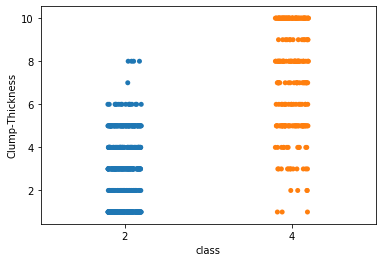

In [7]:
sns.stripplot(x="class", y="Clump-Thickness", data=rdf, jitter=True, edgecolor="gray")

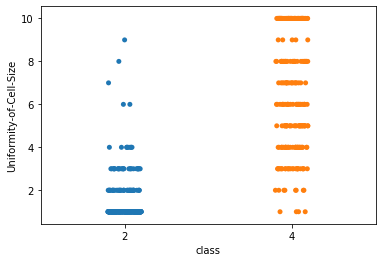

In [8]:
sns.stripplot(x="class", y="Uniformity-of-Cell-Size", data=rdf, jitter=True, edgecolor="gray")

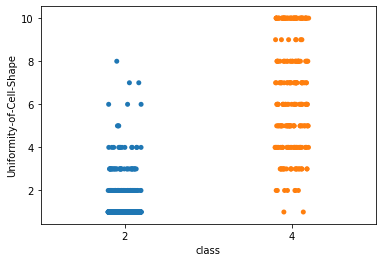

In [9]:
sns.stripplot(x="class", y="Uniformity-of-Cell-Shape", data=rdf, jitter=True, edgecolor="gray")

C:\Users\adibr\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


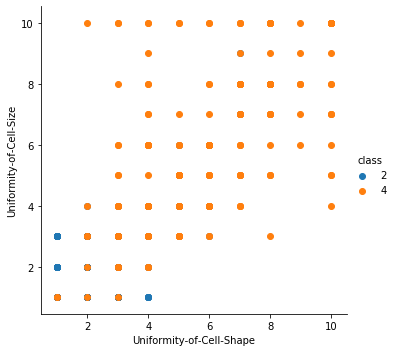

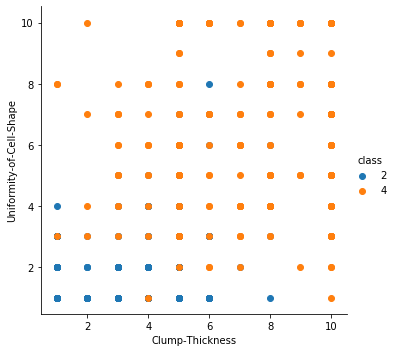

In [10]:
sns.FacetGrid(rdf, size=5,hue="class").map(plt.scatter,"Uniformity-of-Cell-Shape","Uniformity-of-Cell-Size").add_legend()
sns.FacetGrid(rdf, size=5,hue="class").map(plt.scatter,"Clump-Thickness","Uniformity-of-Cell-Shape").add_legend()

C:\Users\adibr\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
C:\Users\adibr\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\adibr\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


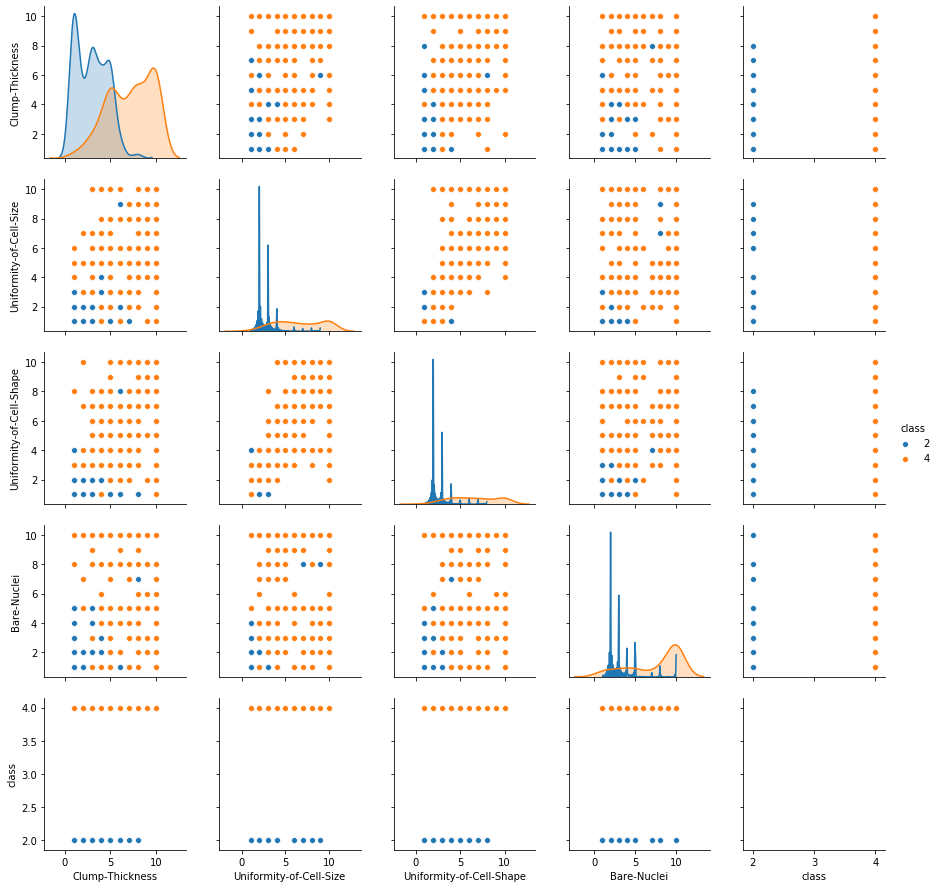

In [11]:

rdf.loc[rdf['class'] == '2', 'class'] = '2' 
rdf.loc[rdf['class'] == '4', 'class'] = '4'

fig = sns.pairplot(rdf.dropna(), hue='class') 
fig.savefig("pairplot.png")

In [18]:
c = DecisionTreeClassifier(min_samples_split=3)
dt = c.fit(x_train,y_train)

def show_tree(tree,features,path):
    f=io.StringIO()
    export_graphviz(tree,out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imread(path)
    plt.rcParams["figure.figsize"]=(200,200)
    plt.imshow(img)


names = rdf.columns
names = names.drop(labels=['class'])
show_tree(dt,names,"tree_01.png")


In [20]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
score = accuracy_score(y_test,y_pred) * 100
hyperparams = {"max_depth":[5,10,15], "min_samples_split":[3,5,7]}  
tree_clf = DecisionTreeClassifier()  
clf = GridSearchCV(tree_clf, hyperparams, cv=5, n_jobs=-1, verbose=True) 
print("accuracy using decision tree: ",round(score,1),"%")
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_expect, y_pred)
print(conf_matrix)
print("CROSS VALIDATION ACCURACY SCORE: ", clf.best_score_)
print("\n\t\t# === CLASSIFICATION REPORT === #\n", metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy using decision tree:  95.2 %
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[[149   7]
 [  4  71]]
CROSS VALIDATION ACCURACY SCORE:  0.9508547008547008

		# === CLASSIFICATION REPORT === #
               precision    recall  f1-score   support

         2.0       0.97      0.96      0.96       156
         4.0       0.91      0.95      0.93        75

    accuracy                           0.95       231
   macro avg       0.94      0.95      0.95       231
weighted avg       0.95      0.95      0.95       231



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.0s finished


In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)
y_pred = nb_clf.predict(x_test)
print("ACCURACY SCORE: ", clf.score(x_test, y_test))
print("K-Fold Cross Validation Accuracy Score :", np.mean(cross_val_score(nb_clf, x_train, y_train, cv=10, scoring='accuracy')))
print("# === CONFUSION MATRIX === #\n", confusion_matrix(y_true=y_test, y_pred=y_pred))
print("\n\t\t# === CLASSIFICATION REPORT === #\n", classification_report(y_true=y_test, y_pred=y_pred))

ACCURACY SCORE:  0.9523809523809523
K-Fold Cross Validation Accuracy Score : 0.9570748535306814
# === CONFUSION MATRIX === #
 [[152   4]
 [  4  71]]

		# === CLASSIFICATION REPORT === #
               precision    recall  f1-score   support

         2.0       0.97      0.97      0.97       156
         4.0       0.95      0.95      0.95        75

    accuracy                           0.97       231
   macro avg       0.96      0.96      0.96       231
weighted avg       0.97      0.97      0.97       231

